<a href="https://colab.research.google.com/github/hhidayatinc/PCVK_Martikulasi_2022/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


No 1

Gamma Correction pada citra
--------------------------------
Masukkan nilai gamma: 3


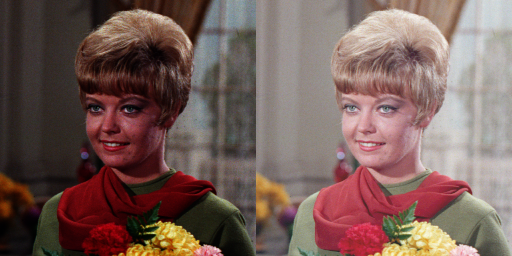

In [3]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

print('Gamma Correction pada citra')
print('--------------------------------')
try:
  gamma = int(input('Masukkan nilai gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)
invGamma = 1/gamma

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(((original[y,x,c]/255) ** invGamma) * 255, 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

No 2

Bit Depth pada citra
--------------------------------
Masukkan nilai bit: 2


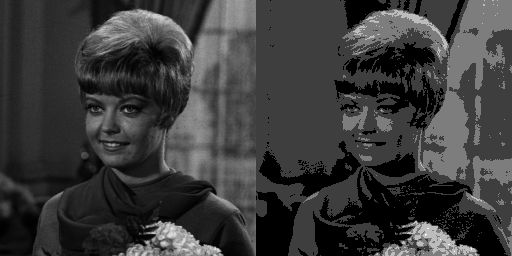

In [20]:
print('Bit Depth pada citra')
print('--------------------------------')
try:
  bit_depth = int(input('Masukkan nilai bit: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff', cv.IMREAD_GRAYSCALE)
bit_image = np.zeros(original.shape, original.dtype)
level = 255/(2**bit_depth) -1

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    bit_image[y,x] = np.clip(round((original[y,x]/level))*level, 0, 255)

final_frame = cv.hconcat((original, bit_image))
cv2_imshow(final_frame)

No 3

In [14]:
import glob #library untuk membaca semua image di dalam folder
from math import log10, sqrt #untuk perhitungan matematika

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg') #gambar asli yang akan dibandingkan
cv_img = [] #dari sini sampe cv_img.append aku liat di modul
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

In [17]:
def PSNR(img,amount):#funci pnsr in liat di modul
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
  mse = np.mean((first_image) ** amount)
  if(mse==0):
    return 100
  
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel/sqrt(mse))
  return psnr


print('Average pada citra')
print('--------------------------------')
try:
  averageCitra = int(input('Masukkan nilai average: '))
except ValueError:
  print('Error, not a number')

noise = PSNR(cv_img, averageCitra)
print('Nilai PSNR Average ', averageCitra, ' adalah',noise,'(dB)')


Average pada citra
--------------------------------
Masukkan nilai average: 30
Nilai PSNR Average  30  adalah 30.16807467263462 (dB)


No 4

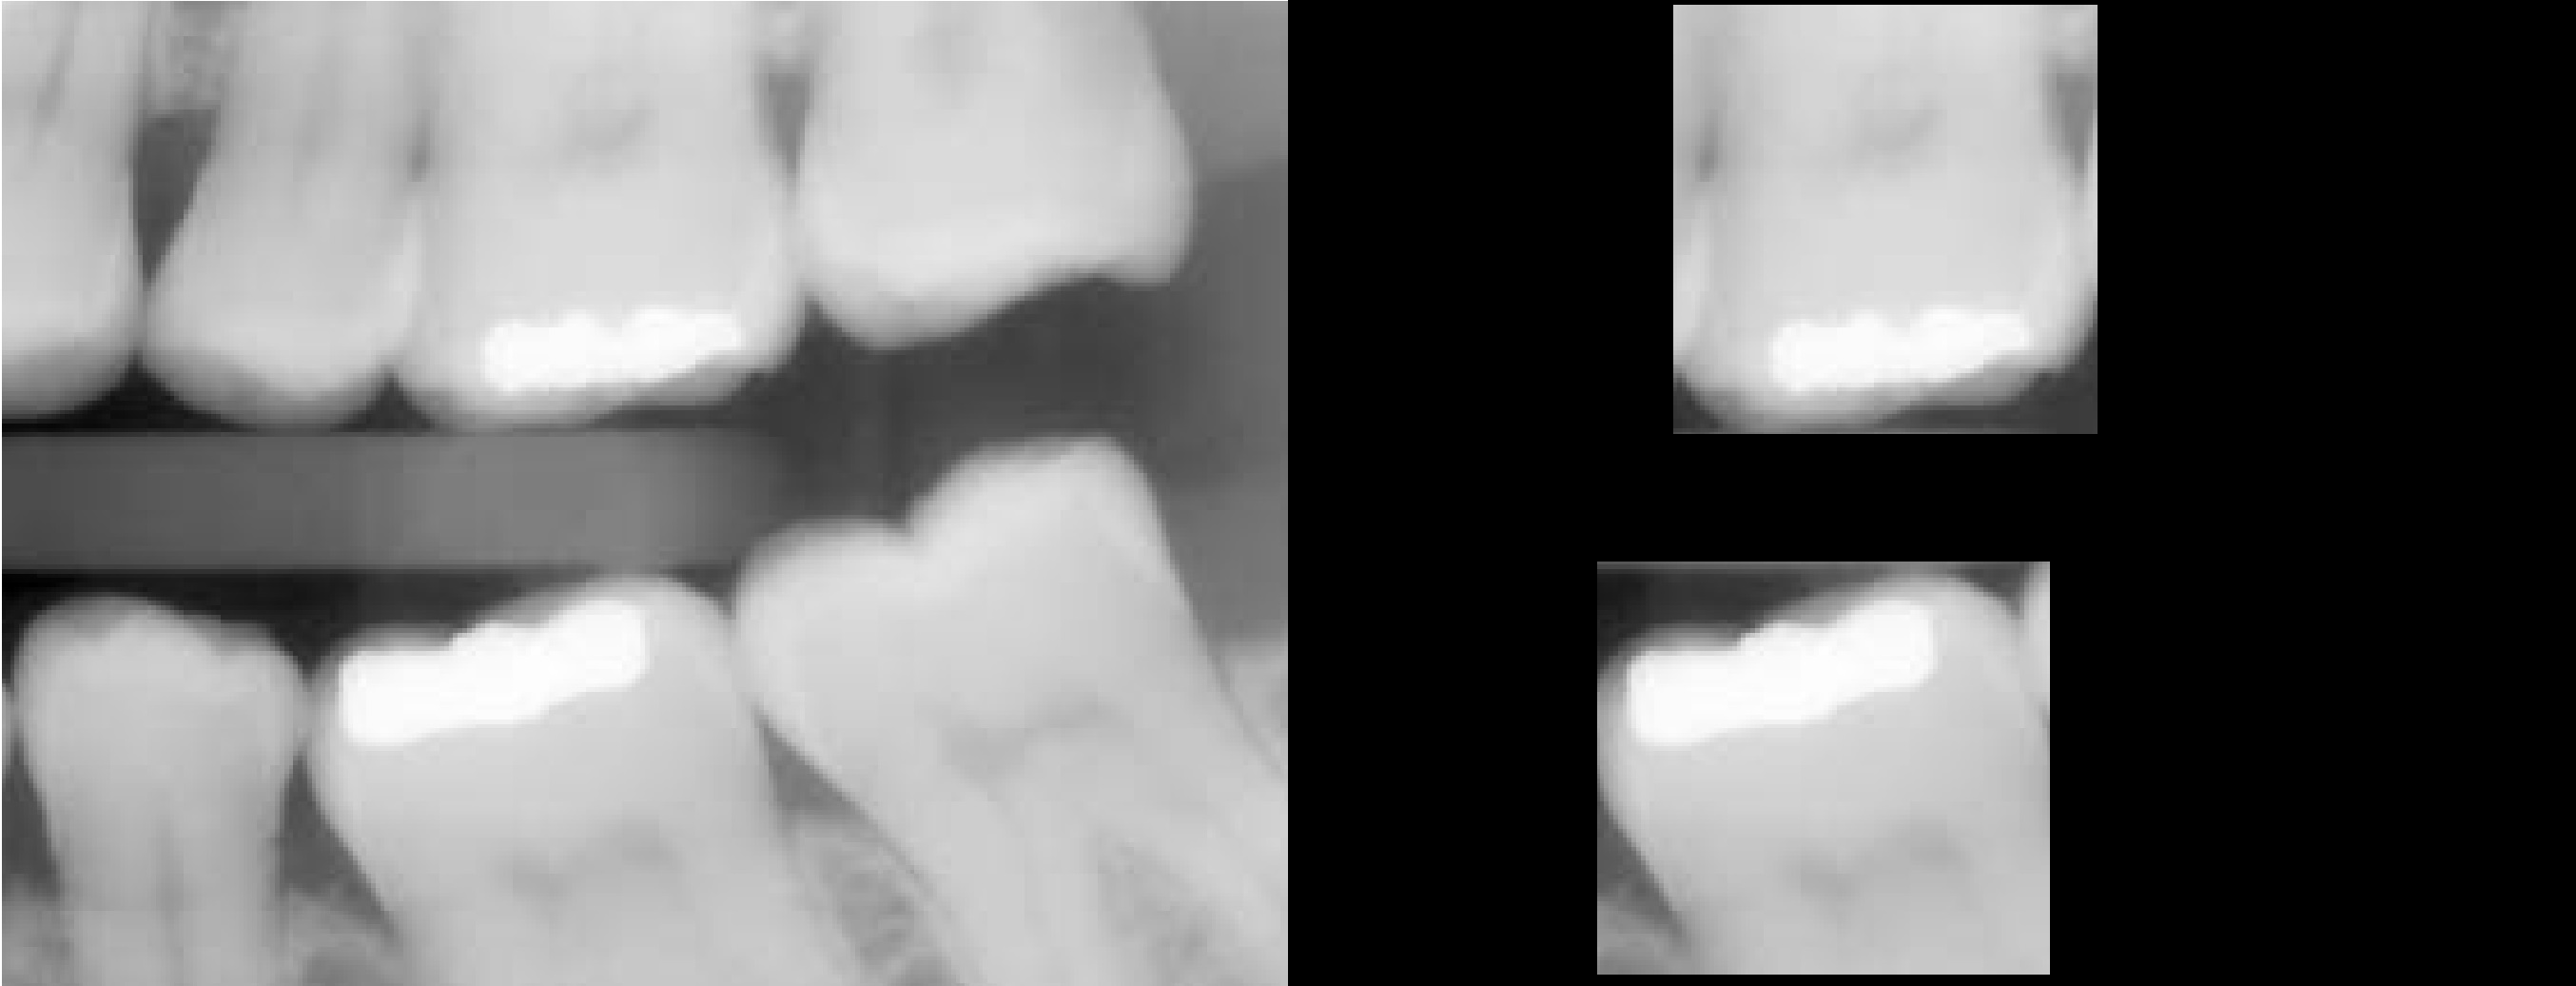

In [18]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg');
mask = np.zeros(img.shape, img.dtype)
mask = cv.rectangle(mask,pt1=(325, 590), pt2=(800,1023), color=(255,255,255), thickness=-1)
result = img & mask
mask1 = cv.rectangle(mask, pt1=(405,5), pt2=(850,455), color=(255,255,255), thickness=-1)

result = img & mask1

final_frame = cv.hconcat((img, result))
cv2_imshow(final_frame)

No 5